In [1]:
from torchvision import models
print(dir(models))

['AlexNet', 'DenseNet', 'GoogLeNet', 'GoogLeNetOutputs', 'Inception3', 'InceptionOutputs', 'MNASNet', 'MobileNetV2', 'ResNet', 'ShuffleNetV2', 'SqueezeNet', 'VGG', '_GoogLeNetOutputs', '_InceptionOutputs', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'detection', 'googlenet', 'inception', 'inception_v3', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'quantization', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext50_32x4d', 'segmentation', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'shufflenetv2', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'utils', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'video', 'wide_resnet101_2', 'wide_r

In [2]:
resnet = models.resnet101(pretrained=True)

In [3]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])
print(preprocess)

Compose(
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360 at 0x23BCCD891C8>


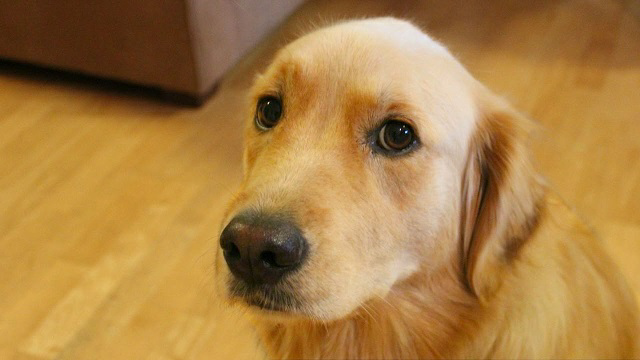

In [5]:
from PIL import Image
img = Image.open("./data/ch2/dog_0.png")
print(img)

img  # to see the picture inline

# img.show()  # show it on the system picture viewer

In [6]:
img_t = preprocess(img)

import torch
batch_t = torch.unsqueeze(img_t, 0)

In [7]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
import time
tic = time.time()

out = resnet(batch_t)

toc = time.time()

print("Spent time: " + str(1000 * (toc - tic)) + "ms")
out

Spent time: 1171.8649864196777ms


tensor([[-3.3702e+00, -1.6372e+00, -2.3867e+00, -3.2735e+00, -3.0963e+00,
         -1.1889e+00, -1.9220e+00, -2.5154e+00, -1.3697e+00, -2.9111e+00,
         -1.6011e+00, -1.1779e+00, -2.6204e+00, -2.9735e+00, -2.2319e+00,
         -2.8096e+00, -3.2874e+00, -7.3691e-01, -7.0593e-01, -1.2101e+00,
         -3.0284e+00, -3.8793e+00, -2.3409e+00, -1.2090e+00, -1.2104e+00,
         -8.1466e-01, -2.7630e+00, -2.3145e+00, -1.8940e+00, -3.0064e+00,
         -3.1136e+00, -1.6807e+00, -1.8358e+00, -1.9352e+00, -1.8061e+00,
         -3.1428e+00, -1.0839e+00, -1.1123e+00, -9.0786e-01, -9.3891e-01,
         -2.6463e-01, -1.3868e+00,  1.4160e+00, -6.1858e-02, -1.6140e+00,
         -1.3521e+00,  1.0276e+00, -8.8173e-01, -3.0366e+00, -2.7201e+00,
         -2.5376e+00, -2.1220e+00, -1.3530e+00, -1.5466e+00, -1.5386e+00,
         -9.4505e-01, -2.2197e-01, -1.8022e+00, -2.8921e+00, -3.0988e-01,
         -5.7423e-02, -7.6117e-01, -4.1977e-01, -1.1263e+00, -1.1373e+00,
         -1.6864e+00, -1.3759e+00, -1.

In [10]:
with open("./data/ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [12]:
_, index = torch.max(out, 1)

In [15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 95.76653289794922)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 95.76653289794922),
 ('Labrador retriever', 3.1746487617492676),
 ('redbone', 0.32110336422920227),
 ('cocker spaniel, English cocker spaniel, cocker', 0.23907269537448883),
 ('tennis ball', 0.140793114900589)]